## Theory Questions


1) To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim. 
<br>

Answer: 
<br>
Model performance is more important to us because if we consider only accuracy we may think we trained a good clasifier but if we "dig in" and look at performance statistics we could find out that we misdiagnosed patients (bad for medical screening!). Accuracy works well only if there are equal number of samples belonging to each class, otherwise if we rely on accuracy in imbalaced dataset this may lead to misdiagnosis and severe consequences. i.e. imbalanced medical data of cancer diagnosis, few positive and many negative diagnosis in this case the performance of the model is crucial in order not to misdiagnosed patients.
 

2) T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.
<br>

Answer: 
<br>
If the feature of BP and BMI are correlated the peroformances of the model could be poor and we would prefer use all of the features together becuase the other features may predict better T1D diagnosis. 
If the two features (BP and BMI) are uncorellated and the rest of the features are then we may prefer to use only two features because they are the most informative.


2 of the features:

pros-
low complexity leading to reduced running time. reduced overfitting because we have less features for training. Maybe could improve accuracy if we train our model on meaningful features. 
<br>

cons - 
underfitting, some features which when trained alone may seem neglegible could be meaningful if combined with other features. 

Moreover,From the listed features, In particular we would suspect blood pressure (BP) and body-mass index (BMI) to correlate with each other. At next, we would also suspect correlation between the features- age (A), level of physical activity (P), and income (I). Therefore if we had to choose 2 features from the entire list we would choose one feature from each of those groups, OR we just ask for 2 uncorralated feaures. This because the effect of high correlated features would be similar.
<br>

many features 
<br>
pros - 
may be more descriptive data. 
<br>
cons - 
More features meaning higher model's complexity. Can be missleading with non-informative features and also cause higher run time. 

A large number of features can lead to curse of dimensionality but this is not relevent to our specific case because we do not consider 5 feautres as a hig dimentional data. Another notable thing is that when using more than 3D data it is much more difficult to visualize the solution.

3) A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.
<br>

Answer:
<br>
With SVM it would be quite difficult to choose an appropriate supporting vectors because the data features are quite similar to one another and the margins would not be maximal and we could get many misclassifications. With logistic regression we don't have this problem and we could classify the data simply by using statistic tools. 

4) What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?
<br>

Answer:

SVM is geometrically motivated while Logistic Regression asume probabilistic model while focusing on the maximization of the data. In svm we try to find the separating hyperplane that maximizes the distance of the nearest points to the margin- the support vectors. Outliers are better handled by linear SVM because it is derive maximum margin solution.

Both models share the regularization hyperparameter $\lambda$ or $C=1/\lambda$. As for SVM- C is adding the penalty for each  misclassication of data point. For small C a large margin decision boundery is chosen at the expense of a greater number of misclassification. As for Logistic Regression, C again controling the penalty strength to reduce overfitting.

Other hyper-parameters of the Logistic Regression model could be penalty, solver, 
Other hypter-parameters of SVM include kernel type, (gamma for rbf and polynomial, polynomial degree for polynomial kernel and more..)

# Coding assignment

# Question 1
Loading the data:

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pathlib import Path
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix,roc_auc_score,plot_roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import hinge_loss


In [2]:
df = pd.read_csv("HW2_data.csv", header='infer')
df.head(10)

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,Male,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Negative,0
1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative,0
2,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Positive,0
3,59,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive,1
4,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive,0
5,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative,0
6,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative,1
7,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive,0
8,37,Male,No,No,No,Yes,No,No,No,No,No,Yes,No,No,Yes,No,Positive,1
9,56,Male,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive,1


Pre-processing (Explenations below):

In [3]:
# replace the non-realistic (0 in our case) values with nan
df_nan = df.copy()
df_nan.loc[:, :] = df_nan.loc[:, :].replace('', np.nan) 

# print fraction of nan values for each feature for negative/positive diagnosis
print("% of nan values for each feature for negative and positive diagnosis" )
print("")
print("Negative Diagnosis")
print(100*df[df['Diagnosis'] == 'Negative'].isna().sum()/df[df['Diagnosis'] == 'Negative'].shape[0])
print("")
print("Positive Diagnosis")
print(100*df[df['Diagnosis'] == 'Positive'].isna().sum()/df[df['Diagnosis'] == 'Positive'].shape[0])
print("")

# fraction of negative subjects with nan values
is_NaN_neg = df[df['Diagnosis'] == 'Negative'].isnull()
row_has_NaN_neg = is_NaN_neg.any(axis=1)
print('negative frac: ' ,100*row_has_NaN_neg.sum()/df[df['Diagnosis'] == 'Negative'].shape[0])
print("")

# fraction of positive subjects with nan
is_NaN_pos = df[df['Diagnosis'] == 'Positive'].isnull()
row_has_NaN_pos = is_NaN_pos.any(axis=1)
print('positive frac: ', 100*row_has_NaN_pos.sum()/df[df['Diagnosis'] == 'Positive'].shape[0])

# drop nan measurements
df = df_nan.dropna()


% of nan values for each feature for negative and positive diagnosis

Negative Diagnosis
Age                    0.000000
Gender                 0.000000
Increased Urination    0.000000
Increased Thirst       4.954955
Sudden Weight Loss     2.252252
Weakness               0.000000
Increased Hunger       2.252252
Genital Thrush         2.702703
Visual Blurring        0.000000
Itching                2.702703
Irritability           0.000000
Delayed Healing        0.000000
Partial Paresis        0.000000
Muscle Stiffness       2.702703
Hair Loss              0.000000
Obesity                0.000000
Diagnosis              0.000000
Family History         0.000000
dtype: float64

Positive Diagnosis
Age                    0.000000
Gender                 0.000000
Increased Urination    0.000000
Increased Thirst       2.623907
Sudden Weight Loss     1.166181
Weakness               0.000000
Increased Hunger       2.332362
Genital Thrush         2.332362
Visual Blurring        0.000000
Itching     

# We decided to eliminate nan rows becuase the fraction of "bad" data is <10% and we still have enough subjects. We want an accurate classifier and so we won't fill in nan with guessed values
Note: most of the features don't need normalization - the data contains age and yes/no answers. In section 4 we would min-max normalize the age.



# Question 2

test-train split of 20% test:


In [4]:
# features columns
X = df.copy()
X.drop(columns='Diagnosis', inplace=True)

# diagnosis vector
y = df['Diagnosis']

# features names
features = X.columns

# ignore Age and Gender
features2 = features.drop(['Age','Gender'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)


# Question 3

At first, lets see that the total label's frequencies are consistent between Train set and Test set

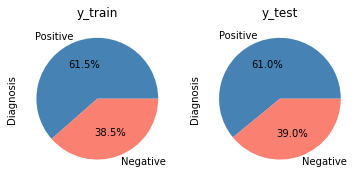

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2)

labels_order=y_train.value_counts()#make sure to keep the labels order
y_train.value_counts().plot(kind="pie",ax=ax1, labels=[labels_order.index[0],labels_order.index[1]], colors = ['steelblue', 'salmon'], autopct='%1.1f%%')

ax1.set_title('y_train')
ax2=y_test.value_counts().plot(kind="pie",ax=ax2, labels=[labels_order.index[0],labels_order.index[1]], colors = ['steelblue', 'salmon'], autopct='%1.1f%%')
ax2.set_title('y_test')
plt.show()

Now, lets look on the feature's  histograms while setting density=True to get the probability density. The area under the histogram for both Train and test in each subplot (feature) integrates to 1. Therefore, we can see if the distribution of the features is similar between test and train for each feature and if train and test corralate the same way. 

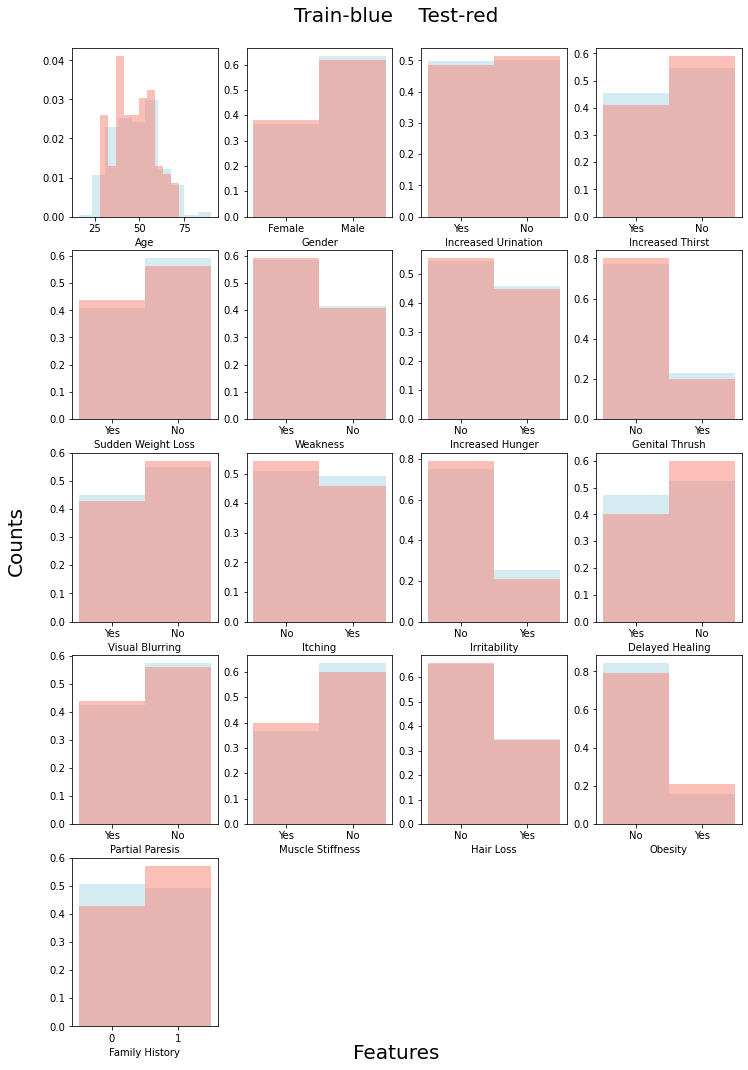

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(12, 18))
axes = axes.flatten()[:-3]#eliminate empty axes

Features = X_train.columns
n_bins=10
for idx, ax in enumerate(axes):
    ax.hist(X_train.iloc[:, idx], n_bins,density=True,color='lightblue',alpha=0.5)
    ax.hist(X_test.iloc[:, idx], n_bins,density=True,color='salmon',alpha=0.5)
    #density=True ==>the area under the histogram integrates to 1 so we can see if the train and test corralate the same way
    n_bins=np.arange(3)-0.5#after age hist all the others are binary and we want to plot the bin's lables at the center of the bin
    ax.set_xlabel(Features[idx])

plt.delaxes()#remove empty axes
plt.delaxes()#remove empty axes
plt.delaxes()#remove empty axes
fig.text(0.5, 0.1, 'Features', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'Counts', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.9, "Train-blue    Test-red", ha='center',fontsize=20)

plt.show()

From the above figure we see that most of the plots are maintaining the same ratio between test and train and they almost congruent for every feature. Exception is shown for example for the feature "Family Hisory" which is showing less correlation between the probability densities. Another notable exeption is shown for the feature "Delayed Healing" which the ratio between 'Yes' and 'No' in the test set (red) is bigger than the ratio between 'Yes' and 'No' in the train set (blue).


More specific analysis is needed:

In [7]:
PositiveFeatures = {}
NegativeFeatires = {}

for feat in features.drop("Age"):
    mySum = 0
    L_train = len(X_train[feat])
    L_test = len(X_test[feat])
    
    if feat == "Gender":
        mySum_train = (X_train[feat]=="Female").sum()
        mySum_test = (X_test[feat]=="Female").sum()
        pos_train_per = round(100*mySum_train/L_train)
        pos_test_per = round(100*mySum_test/L_test)
        pos_delta = pos_train_per - pos_test_per
        PositiveFeatures[feat] = {"Train %": pos_train_per, "Test %": pos_test_per, "Delta %": pos_delta}

    if feat == "Family History":
        mySum_train = (X_train[feat]==1).sum()
        mySum_test = (X_test[feat]==1).sum()
        
        pos_train_per = round(100*mySum_train/L_train)
        pos_test_per = round(100*mySum_test/L_test)
        pos_delta = pos_train_per - pos_test_per
        
        PositiveFeatures[feat] = {"Train %": pos_train_per, "Test %": pos_test_per, "Delta %": pos_delta}

    if feat != "Family History" and feat !=  "Gender":
        mySum_train = (X_train[feat]=="Yes").sum()
        mySum_test = (X_test[feat]=="Yes").sum()
        
        pos_train_per = round(100*mySum_train/L_train)
        pos_test_per = round(100*mySum_test/L_test)
        pos_delta = pos_train_per - pos_test_per
        
        PositiveFeatures[feat] = {"Train %": pos_train_per, "Test %": pos_test_per, "Delta %": pos_delta}

print('Positive features distribution table:')
print(pd.DataFrame.from_dict(PositiveFeatures).T)
print('') 

# comment positive gender = female, positive family history = 1

Positive features distribution table:
                     Train %  Test %  Delta %
Gender                    37      38       -1
Increased Urination       50      49        1
Increased Thirst          45      41        4
Sudden Weight Loss        41      44       -3
Weakness                  58      59       -1
Increased Hunger          46      45        1
Genital Thrush            23      20        3
Visual Blurring           45      43        2
Itching                   49      46        3
Irritability              25      21        4
Delayed Healing           47      40        7
Partial Paresis           43      44       -1
Muscle Stiffness          37      40       -3
Hair Loss                 35      34        1
Obesity                   16      21       -5
Family History            49      57       -8



The table above is showing the precentage of positive subjects for a specific feature in both train set and test set. The delta represent the differences in the precentages of those two groups (Test-Train).
The table is not showing the differences in ages, positive subject for the gender feature is "female" and positive subject for the Family History is "1".

Note: as we saw before, "Family History" and "Delayed Healing" are giving us the biggest delta- the biggest difference is existing in those features.

Note: the negative features distribution table complete the precentage of the above table to-100 (and the delta will change its sign).

# Answers:
# ai - 
imbalance of features between train and test can cause poor predictive performances of our model due to wrong assumption of equally distributed data. The classifier could have a bias toward majority instances, and it ignores the minority ones. Another risk is that classifiers tend to overfit the training data which provokes poor classification accuracy on unseen data. Relating to medical diagnosis - misclassifying a rare event can result in more serious problems than a common event, i.e. cancer cell detection.

# aii- 
We can solve the issue by spliting the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset - stratified train-test split.

Importent Note: When we run ALL the above cells without setting "stratify = y" in the split of Q2 we can see the imbalance of features in our analysis. First- The pie-plot is showing un-consistent in the total label's frequencies between Train and Test. Second-  Our subplots from above are showing degraded ratio between test and train labels for each feature. Third- in our Positive features distribution table we see a much bigger delta values for the feautures.

Therefore- stratify is needed here for spliting the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. This will help us deal with imbalance of features.


# b

In this Paragraph we are asked for plots to show the relationship between feature and label.
First of all, in the next cell we will plot the relationship between feature and label with a comparison between the Test and Train. We will do so by updating the variable "Chosen_Feature" with the feature that we want to plot. 

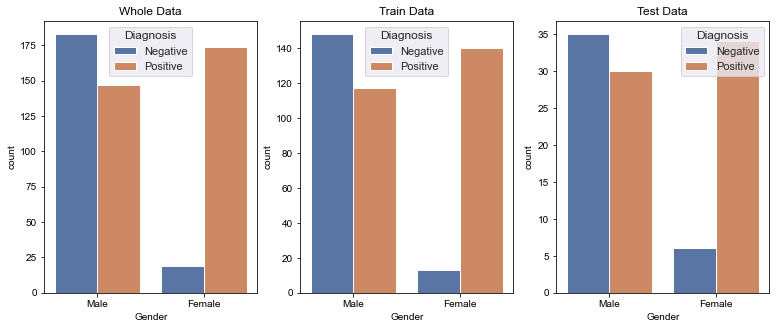

In [8]:
Chosen_Feature=features[1]

# build Train and Test labled data to plot:
Train4Plot=pd.concat([X_train.copy(),y_train.copy()],axis=1)
Test4Plot = pd.concat([X_test.copy(), y_test.copy()], axis=1)
X4Plot=pd.concat([X.copy(), y.copy()], axis=1)


#plot hists with lables
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(13, 5))
sns.set_theme(style="darkgrid")
sns.countplot(x=Chosen_Feature, hue="Diagnosis",order=['Male','Female'],hue_order=['Negative','Positive'],data=X4Plot,ax=axes[0])
sns.countplot(x=Chosen_Feature, hue="Diagnosis",order=['Male','Female'],hue_order=['Negative','Positive'], data=Train4Plot,ax=axes[1])
sns.countplot(x=Chosen_Feature, hue="Diagnosis",order=['Male','Female'],hue_order=['Negative','Positive'], data=Test4Plot,ax=axes[2])
axes[0].title.set_text('Whole Data')
axes[1].title.set_text('Train Data')
axes[2].title.set_text('Test Data')

plt.show()

Now, lets look at the relationships between all features and their labels in the entire data:

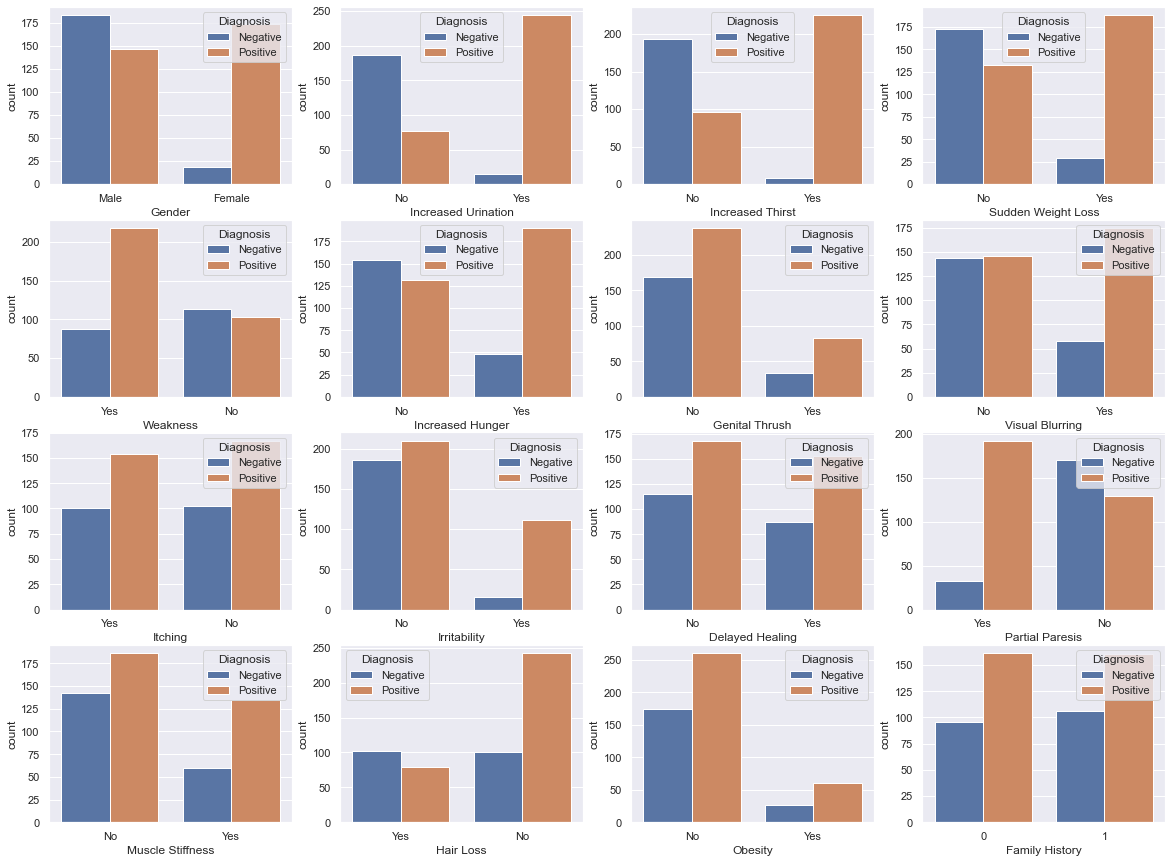

In [9]:
features3 = X.iloc[:,1:-1]
f, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for ii, feat in enumerate(features3.columns):
    sns.countplot(x=df[feat],  hue=df["Diagnosis"],  data=df["Diagnosis"],  ax=axes[ii])
sns.countplot(x='Family History',  hue=df["Diagnosis"],  data=df, ax=axes[15])

plt.show()

C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


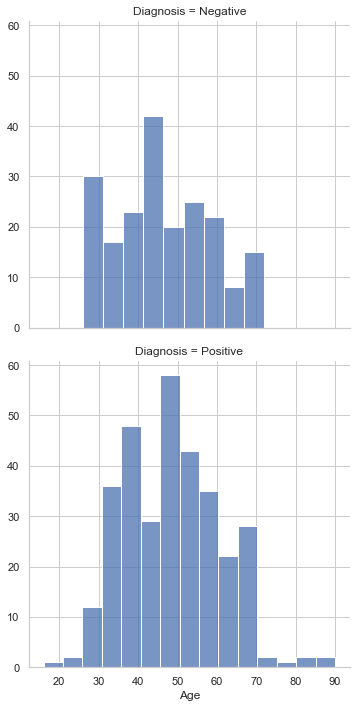

In [10]:
sns.set_style('whitegrid')
sns.FacetGrid(df, 'Diagnosis', height=5).map(sns.histplot, 'Age').add_legend()
plt.show()

# C

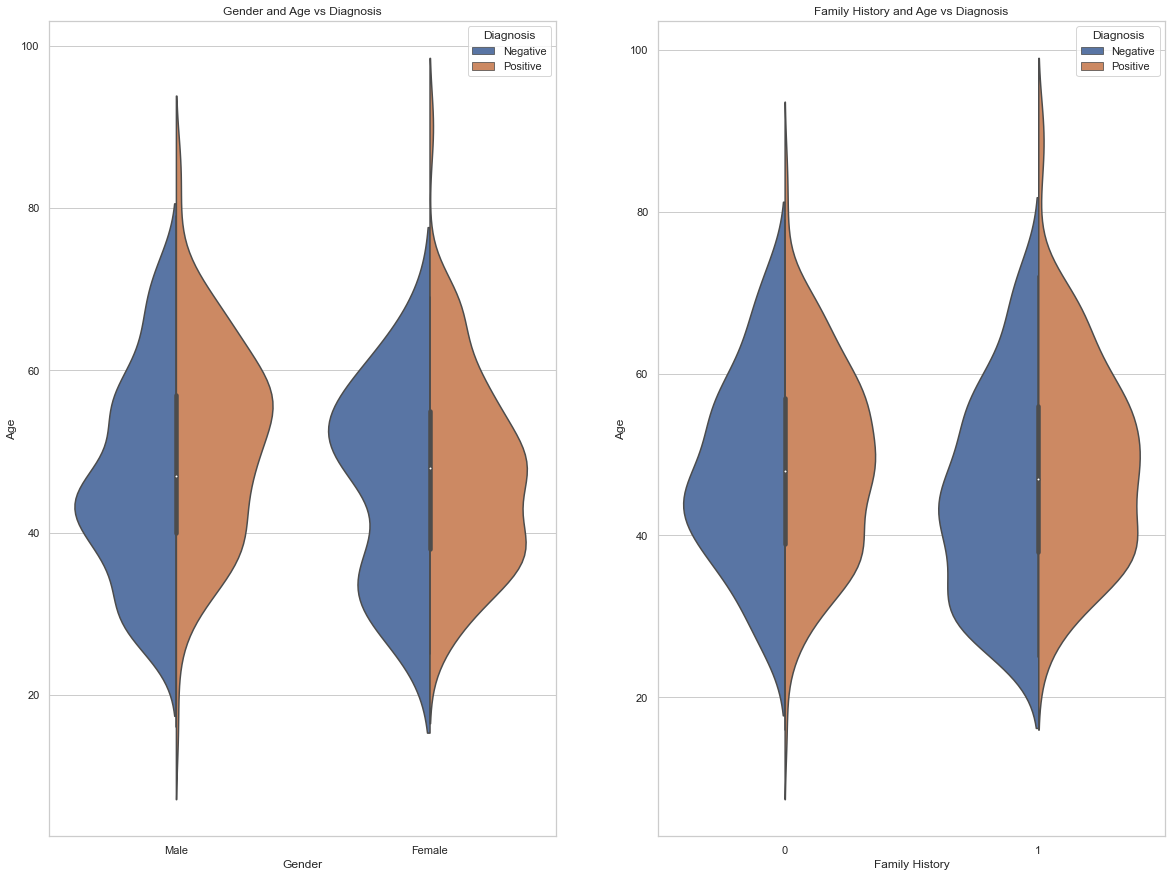

In [11]:

f, axes = plt.subplots(1,2,figsize=(20, 15))

# Gender vs Age vs Diagnosis
sns.violinplot(x="Gender", y="Age", hue="Diagnosis", data=df,split=True, ax=axes[0])
axes[0].set_title('Gender and Age vs Diagnosis')

# Family History vs Age vs Diagnosis
sns.violinplot(x="Family History", y="Age", hue="Diagnosis", data=df,split=True,ax=axes[1])
axes[1].set_title('Family History and Age vs Diagnosis')
plt.show()


In the left graph we could see the connection between gender and age for positive and negative subjects - it could be seen that for males the age distribution is quite different for positive and negative subjects - older positive vs younger negative to T1D. For females the age distribution is quite similar for positive and negative subjects. 
<br>
Right graph - Positive subjects with family history tend to be older in relation to negative subjectes wuith family history. 

# d
# i - 
We expected that 'Family History' will be a significant feature to our model because we read that genetics is a possible cause of T1D. That proven false according to question 3b, we see that the distribution of negative and positive subjects is similar for the family history feature. (more explenations to feature's importance due to our analysis is given in d-ii below).
For the features of irritability and weakness which are key symptoms (according to the site attached to the HW) - most of the positive subjects don't express the symptoms according to section 3b.
Another unexpected thing is that most of the females in the data are positive to T1D. This could lead to biased model. There are more younger and older subjects with T1D then negative subjects.

# ii - 
The features we feel that will be particularly important to our model are features with inverse relation between positive and negative subjects. For example: Gender, Increased urination, increaed thirst, sudden weight loss, increaed hunger, partial paresis. In increased thirst it could be seen that most of the postive participants suffer from increased thirst, unlike the negative subjects.


# Question 4

Encoding all of our data as one hot vectors:

In [12]:
# create one hot encoder
enc = preprocessing.OneHotEncoder()

# feature columns without age and diagnosis
X_HV = df.copy()
X_HV_no_age = X_HV.drop(['Age', "Diagnosis"], axis=1)
clms_enc = X_HV_no_age.columns

# one hot encoding of the features
X_HV_no_age = enc.fit_transform(X_HV_no_age).toarray()

# feature columns names
column_names = enc.get_feature_names(clms_enc)
list_cols = column_names.tolist()
list_cols.append('Age') # Add Age back

# Add age feature back
scaler = MinMaxScaler()
X_HV = np.concatenate((X_HV_no_age, scaler.fit_transform(np.array([X_HV["Age"].values]).T) ), axis=1)

# label encoding
le = preprocessing.LabelEncoder()

y_HV = df["Diagnosis"]
y_HV = le.fit_transform(y_HV)

# splitting the data again
X_train_HV , X_test_HV , y_train_HV , y_test_HV = train_test_split(X_HV, y_HV, test_size=0.2, random_state=0, stratify = y_HV)



# Question 5

In this question we will use 5k cross fold validation and we will tune the models to achieve the highest test AUC

# a-i
Training linear models (Logistic Regression and Linear SVM) on the training set:

In [13]:
def LR_best_model(X_train, y_train, isPCA):
    max_iter = 1000
    solver = 'liblinear'

    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

    
    lmbda = np.array([0.001, 0.01, 1, 10, 100, 1000])
    
    if isPCA==0:
        log_reg = LogisticRegression(random_state=5, max_iter=max_iter,solver=solver)
        pipe_log = Pipeline(steps = [('logistic', log_reg)])


    if isPCA==1:
        log_reg = LogisticRegression()
        pca_2 = PCA(n_components=2)
        pipe_log = Pipeline(steps= [ ('pca', pca_2), ('logistic', log_reg)])

        
    clf = GridSearchCV(estimator=pipe_log, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l1','l2']},
                       scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                       refit='roc_auc', verbose=3, return_train_score=True)
    clf.fit(X_train, y_train)
    return clf


In [14]:
clf = LR_best_model(X_train_HV, y_train_HV, isPCA=0)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] logistic__C=1000.0, logistic__penalty=l1 ........................
[CV]  logistic__C=1000.0, logistic__penalty=l1, accuracy=(train=0.943, test=0.940), f1=(train=0.953, test=0.952), precision=(train=0.965, test=0.943), recall=(train=0.941, test=0.962), roc_auc=(train=0.984, test=0.990), total=   0.0s
[CV] logistic__C=1000.0, logistic__penalty=l1 ........................
[CV]  logistic__C=1000.0, logistic__penalty=l1, accuracy=(train=0.955, test=0.881), f1=(train=0.964, test=0.900), precision=(train=0.961, test=0.938), recall=(train=0.966, test=0.865), roc_auc=(train=0.992, test=0.953), total=   0.0s
[CV] logistic__C=1000.0, logistic__penalty=l1 ........................
[CV]  logistic__C=1000.0, logistic__penalty=l1, accuracy=(train=0.961, test=0.893), f1=(train=0.969, test=0.909), precision=(train=0.966, test=0.938), recall=(train=0.971, test=0.882), roc_auc=(train=0.991, test=0.952), total=   0.0s
[CV] logistic__C=1000.0,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] logistic__C=100.0, logistic__penalty=l1 .........................
[CV]  logistic__C=100.0, logistic__penalty=l1, accuracy=(train=0.955, test=0.881), f1=(train=0.964, test=0.900), precision=(train=0.961, test=0.938), recall=(train=0.966, test=0.865), roc_auc=(train=0.992, test=0.953), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l1 .........................
[CV]  logistic__C=100.0, logistic__penalty=l1, accuracy=(train=0.961, test=0.893), f1=(train=0.969, test=0.909), precision=(train=0.966, test=0.938), recall=(train=0.971, test=0.882), roc_auc=(train=0.991, test=0.952), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l1 .........................
[CV]  logistic__C=100.0, logistic__penalty=l1, accuracy=(train=0.955, test=0.928), f1=(train=0.963, test=0.943), precision=(train=0.970, test=0.909), recall=(train=0.956, test=0.980), roc_auc=(train=0.988, test=0.975), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l1 .........................
[CV]  logistic__

C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classi

[CV]  logistic__C=0.01, logistic__penalty=l1, accuracy=(train=0.386, test=0.381), f1=(train=0.000, test=0.000), precision=(train=0.000, test=0.000), recall=(train=0.000, test=0.000), roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=l1 ..........................
[CV]  logistic__C=0.01, logistic__penalty=l1, accuracy=(train=0.386, test=0.381), f1=(train=0.000, test=0.000), precision=(train=0.000, test=0.000), recall=(train=0.000, test=0.000), roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=l1 ..........................
[CV]  logistic__C=0.01, logistic__penalty=l1, accuracy=(train=0.383, test=0.393), f1=(train=0.000, test=0.000), precision=(train=0.000, test=0.000), recall=(train=0.000, test=0.000), roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=l1 ..........................
[CV]  logistic__C=0.01, logistic__penalty=l1, accuracy=(train=0.385, test=0.386), f1=(train

C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classi

In [15]:
def SVMlin_best_model(X_train, y_train, isPCA):
    max_iter = 1000
    solver = 'liblinear'

    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

    svc = SVC(probability=True)
    C = np.array([0.001, 0.01, 1, 10, 100, 1000])
    
    if isPCA==0:
        pipe_svm = Pipeline(steps = [('svm', svc)])


    if isPCA==1:
        pca_2 = PCA(n_components=2)
        pipe_svm = Pipeline(steps = [ ('pca', pca_2), ('svm', svc)])

        
        
    svm_lin = GridSearchCV(estimator=pipe_svm,
                 param_grid={'svm__kernel':['linear'], 'svm__C':C},
                 scoring=['accuracy','f1','precision','recall','roc_auc'], 
                 cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
    svm_lin.fit(X_train, y_train)
    return svm_lin


In [16]:
svm_lin = SVMlin_best_model(X_train_HV, y_train_HV, isPCA=0)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.959, test=0.977), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.970, test=0.949), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.617, test=0.607), f1=(train=0.763, test=0.756), precision=(train=0.617, test=0.607), recall=(train=1.000, test=1.000), roc_auc=(train=0.969, test=0.939), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.964, test=0.980), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.886, test=0.905), f1=(train=0.904, test=0.918), precision=(train=0.942, test=0.978), recall=(train=0.868, test=0.865), roc_auc=(train=0.970, test=0.985), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.886, test=0.845), f1=(train=0.904, test=0.860), precision=(train=0.942, test=0.976), recall=(train=0.868, test=0.769), roc_auc=(train=0.982, test=0.956), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.907, test=0.833), f1=(train=0.922, test=0.851), precis

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   19.0s finished


# a-ii
Training non-linear models (Non-Linear SVM and Random Forest) on the training set:

In [17]:
def SVMnonlin_best_model(X_train, y_train, isPCA):
    max_iter = 1000
    solver = 'liblinear'

    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

    svc = SVC(probability=True)
    C = np.array([0.001, 0.01, 1, 10, 100, 1000])
    
    if isPCA==0:
        steps = [('svm', svc)]

    if isPCA==1:
        pca_2 = PCA(n_components=2)
        steps = [('pca', pca_2), ('svm', svc)]
        
    pipe_nonlin = Pipeline(steps)
    svm_nonlin = GridSearchCV(estimator=pipe_nonlin,
                 param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[1,2,3,4], 'svm__gamma':['auto','scale']},
                 scoring=['accuracy','f1','precision','recall','roc_auc'], 
                 cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
    svm_nonlin.fit(X_train, y_train)

    return svm_nonlin


In [18]:
svm_nonlin = SVMnonlin_best_model(X_train_HV, y_train_HV, isPCA=0)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.962, test=0.975), total=   0.0s
[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.971, test=0.955), total=   0.0s
[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.617, test=0.607), f1=(train=0.763, test=0.756), precision=(train=0.617, test=0.607), recall=(train=1.000, test=1.000), roc_auc=(

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.966, test=0.968), total=   0.0s
[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.965, test=0.981), total=   0.1s
[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=poly ..
[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.959, test=0.975), total=   0.0s
[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=poly ..
[CV]  svm__C=0.001, s

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   20.8s finished


In [19]:
def RandomForest_best_model(X_train, y_train, isPCA):
    max_iter = 1000

    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

    if isPCA==0:
        steps = [('rf', rfc())]

    if isPCA==1:
        pca_2 = PCA(n_components=2)
        steps = [('pca', pca_2), ('rf', rfc())]
        
    pipe = Pipeline(steps)
    params={'rf__n_estimators':[10,15,30,50,100,200],'rf__max_features':['auto','sqrt','log2'],
            'rf__max_depth':[6,8,10],'rf__criterion':['gini','entropy']}
    #'rf__bootstrap': [True, False]
    CV_rfc = GridSearchCV(estimator=pipe,
                 param_grid = params,
                 scoring=['accuracy','f1','precision','recall','roc_auc'], 
                 cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
    CV_rfc.fit(X_train, y_train)

    return CV_rfc




In [20]:
CV_rfc = RandomForest_best_model(X_train_HV, y_train_HV, isPCA=0)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10 
[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10, accuracy=(train=0.988, test=0.976), f1=(train=0.990, test=0.981), precision=(train=0.995, test=0.981), recall=(train=0.985, test=0.981), roc_auc=(train=1.000, test=0.996), total=   0.0s
[CV] rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10 
[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10, accuracy=(train=0.982, test=0.929), f1=(train=0.985, test=0.939), precision=(train=0.990, test=1.000), recall=(train=0.980, test=0.885), roc_auc=(train=1.000, test=0.972), total=   0.0s
[CV] rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10 
[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10, accuracy=(train=0.985, test=0.893), f1=(train=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10, accuracy=(train=0.973, test=1.000), f1=(train=0.978, test=1.000), precision=(train=0.980, test=1.000), recall=(train=0.976, test=1.000), roc_auc=(train=0.999, test=1.000), total=   0.0s
[CV] rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=15 
[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=15, accuracy=(train=0.985, test=0.964), f1=(train=0.988, test=0.971), precision=(train=0.990, test=0.962), recall=(train=0.985, test=0.981), roc_auc=(train=0.999, test=0.994), total=   0.1s
[CV] rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=15 
[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=15, accuracy=(train=0.994, test=0.929), f1=(train=0.995, test=0.939), precision=(train=1.000, test=1.000), recall=(train=0.990, test=0.885), roc_auc=(train=1.000, test=0.984), total=   0.0s
[CV] rf__

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  2.0min finished


# b
Reporting the appropriate evaluation metrics of the train and test sets (AUC, F1, LOSS, ACC):

In [21]:
def performances(model, X_train, X_test, y_train, y_test):
    chosen_clf = model.best_estimator_
    y_pred_train = chosen_clf.predict(X_train) 
    y_pred_test = chosen_clf.predict(X_test)
    
    y_pred_proba_train = chosen_clf.predict_proba(X_train) 
    y_pred_proba_test = chosen_clf.predict_proba(X_test)

    print('TRAIN: AUC = {:.2f}'.format(roc_auc_score(y_train, y_pred_proba_train[:,1])) , 'F1 = {:.2f}'.format(f1_score(y_train, y_pred_train)), 'ACC ={:.2f}'.format(accuracy_score(y_train, y_pred_train)))
    print('TEST: AUC = {:.2f}'.format(roc_auc_score(y_test,y_pred_proba_test[:,1])) , 'F1 = {:.2f}'.format(f1_score(y_test,y_pred_test)), 'ACC = {:.2f}'.format(accuracy_score(y_test,y_pred_test)))

In [22]:
def Calc_Loss(model, X_train, X_test, y_train, y_test, type_model):
    chosen_clf = model.best_estimator_
    chosen_clf.fit(X_train, y_train)
    
    if type_model == "LR":
        y_pred_train = chosen_clf.predict_proba(X_train)
        print("Train loss is {:.2f}".format(log_loss(y_train,y_pred_train)))
        
        y_pred_test = chosen_clf.predict_proba(X_test)
        print("Test loss is {:.2f}".format(log_loss(y_test,y_pred_test)))
        
    if type_model == "SVM":
        np.where(y_train==0, -1, y_train)
        np.where(y_test==0, -1, y_test)
        
        y_pred_train = chosen_clf.decision_function(X_train)
        print("Train loss is {:.2f}".format(hinge_loss(y_train,y_pred_train)))

        y_pred_test = chosen_clf.decision_function(X_test)
        print("Test loss is {:.2f}".format(hinge_loss(y_test,y_pred_test)))  

In [23]:
print('logreg best: ', clf.best_params_)
Calc_Loss(clf, X_train_HV, X_test_HV, y_train_HV, y_test_HV, "LR")
performances(clf, X_train_HV, X_test_HV, y_train_HV, y_test_HV)

print("")
print('svm lin best: ', svm_lin.best_params_)
Calc_Loss(svm_lin, X_train_HV, X_test_HV, y_train_HV, y_test_HV, "SVM")
performances(svm_lin, X_train_HV, X_test_HV, y_train_HV, y_test_HV)

print("")
print('svm non-lin best: ', svm_nonlin.best_params_)
Calc_Loss(svm_nonlin, X_train_HV, X_test_HV, y_train_HV, y_test_HV, "SVM")
performances(svm_nonlin, X_train_HV, X_test_HV, y_train_HV, y_test_HV)

print("")
print('random forest best: ', CV_rfc.best_params_)
performances(CV_rfc, X_train_HV, X_test_HV, y_train_HV, y_test_HV)


logreg best:  {'logistic__C': 1.0, 'logistic__penalty': 'l1'}
Train loss is 0.15
Test loss is 0.28
TRAIN: AUC = 0.99 F1 = 0.95 ACC =0.94
TEST: AUC = 0.95 F1 = 0.91 ACC = 0.89

svm lin best:  {'svm__C': 10.0, 'svm__kernel': 'linear'}
Train loss is 0.13
Test loss is 0.26
TRAIN: AUC = 0.98 F1 = 0.96 ACC =0.95
TEST: AUC = 0.95 F1 = 0.92 ACC = 0.90

svm non-lin best:  {'svm__C': 10.0, 'svm__degree': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Train loss is 0.01
Test loss is 0.10
TRAIN: AUC = 1.00 F1 = 1.00 ACC =1.00
TEST: AUC = 0.98 F1 = 0.98 ACC = 0.97

random forest best:  {'rf__criterion': 'entropy', 'rf__max_depth': 8, 'rf__max_features': 'auto', 'rf__n_estimators': 30}
TRAIN: AUC = 1.00 F1 = 1.00 ACC =1.00
TEST: AUC = 0.99 F1 = 0.95 ACC = 0.94


Note: 'svm_degree' represent the degree of 'poly' which is the polynomial kernel function. it's ignored by 'rbf' and other kernels. One more thing that we see here is the almost perfect performances of the non-linear models on the train set. usually we would suspect overfitting but we can see that the test results are also very high so this problem is neglectable in our case. 

Lets look on the confusion matrices of our models:

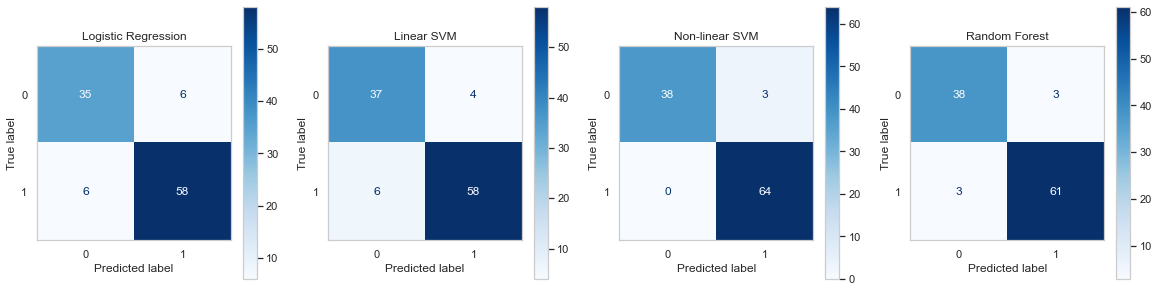

In [24]:
f, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

chosen_clf=clf.best_estimator_
plot_confusion_matrix(chosen_clf,X_test_HV,y_test_HV, cmap=plt.cm.Blues,ax=axes[0])
axes[0].grid(False)
axes[0].set_title('Logistic Regression')

chosen_clf=svm_lin.best_estimator_
plot_confusion_matrix(chosen_clf, X_test_HV,y_test_HV, cmap=plt.cm.Blues,ax=axes[1])
axes[1].grid(False)
axes[1].set_title('Linear SVM')

chosen_clf=svm_nonlin.best_estimator_
plot_confusion_matrix(chosen_clf,X_test_HV,y_test_HV, cmap=plt.cm.Blues,ax=axes[2])
axes[2].grid(False)
axes[2].set_title('Non-linear SVM')

chosen_clf=CV_rfc.best_estimator_
plot_confusion_matrix(chosen_clf,X_test_HV,y_test_HV, cmap=plt.cm.Blues,ax=axes[3])
axes[3].grid(False)
axes[3].set_title('Random Forest')
print('')

Lets visualize the comparison between the classifiers according to AUROC.

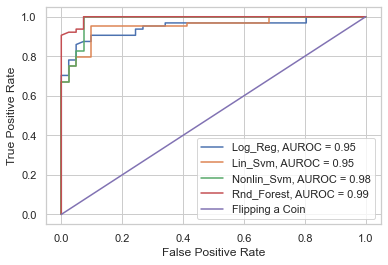

In [25]:
classifiers = [clf.best_estimator_, svm_lin.best_estimator_,svm_nonlin.best_estimator_,CV_rfc.best_estimator_]
roc_score = []
plt.figure()
ax = plt.gca()
for CLF in classifiers:
    plot_roc_curve(CLF, X_test_HV,y_test_HV, ax=ax)
    roc_score.append(np.round_(roc_auc_score(y_test_HV,CLF.predict_proba(X_test_HV)[:,1]), decimals=2))
ax.plot(np.linspace(0,1,X_test_HV.shape[0]),np.linspace(0,1,X_test_HV.shape[0]))
plt.legend(('Log_Reg, AUROC = '+str(roc_score[0]),'Lin_Svm, AUROC = '+str(roc_score[1]),'Nonlin_Svm, AUROC = '+str(roc_score[2]),'Rnd_Forest, AUROC = '+str(roc_score[3]),'Flipping a Coin'))

# c
Answer: 
We can see that non-linear models performed best on this dataset.
The non-linear models yeilded better AUC, F1 and ACC for test data estimation. Visualisation for the differences in AUROC is also given above with the ROC curve. Moreover, the loss of the linear models was higher than the loss of the non-linear svm using 'rbf' and the classification that visualized by the confusion matrices is also directing us to prefer the non-linear models over the linear ones for our dataset.
 

# Question 6

In [26]:
def random_forest_est(n_estimators, X_train, y_train):
    
    clf_RF = rfc(n_estimators=50,criterion='gini',max_depth=10,max_features='auto')
    clf_RF.fit(X_train, y_train)
    
    importances = clf_RF.feature_importances_
    indices = np.argsort(importances)[::-1]

    list_cols[indices[1]]
    f_vec = []
    i = 1
    
    for f in range(X_train.shape[1]):
        if list_cols[indices[f]].find("Yes") != -1 :
            print(i, list_cols[indices[f]], "(", importances[indices[f]], ")") 
            i = i+1
            f_vec.append(indices[f])
        if list_cols[indices[f]].find("Female") != -1 :
            print(i, list_cols[indices[f]], "(", importances[indices[f]], ")") 
            i = i+1
            f_vec.append(indices[f])
        if list_cols[indices[f]].find("Age") != -1 :
            print(i, list_cols[indices[f]], "(", importances[indices[f]], ")")
            i = i+1
            f_vec.append(indices[f])
        if list_cols[indices[f]].find("_1") != -1 :
            print(i, list_cols[indices[f]], "(", importances[indices[f]], ")") 
            i = i+1
            f_vec.append(indices[f])

    x_columns = [list_cols[i] for i in f_vec]

    # Plot the impurity-based feature importances of the forest
    plt.figure(figsize=(15,15))
    plt.title("Feature importances")
    plt.bar(x_columns, importances[f_vec],
            color="r", align="center")
    plt.xticks(x_columns, rotation=90)
    plt.show()
    return clf_RF


1 Increased Urination_Yes ( 0.1329290031094953 )
2 Increased Thirst_Yes ( 0.12187376680455458 )
3 Gender_Female ( 0.06772766690091479 )
4 Age ( 0.05034213439804623 )
5 Partial Paresis_Yes ( 0.029542801863959637 )
6 Hair Loss_Yes ( 0.01952758278734269 )
7 Increased Hunger_Yes ( 0.018457686741242627 )
8 Sudden Weight Loss_Yes ( 0.018391549352360446 )
9 Irritability_Yes ( 0.014502681868474912 )
10 Itching_Yes ( 0.013045872448933127 )
11 Genital Thrush_Yes ( 0.012591316174480354 )
12 Visual Blurring_Yes ( 0.012406032208620861 )
13 Weakness_Yes ( 0.011412741239361961 )
14 Obesity_Yes ( 0.010764552921364143 )
15 Delayed Healing_Yes ( 0.009692160590853574 )
16 Muscle Stiffness_Yes ( 0.009647243640454604 )
17 Family History_1 ( 0.0031080914737650674 )


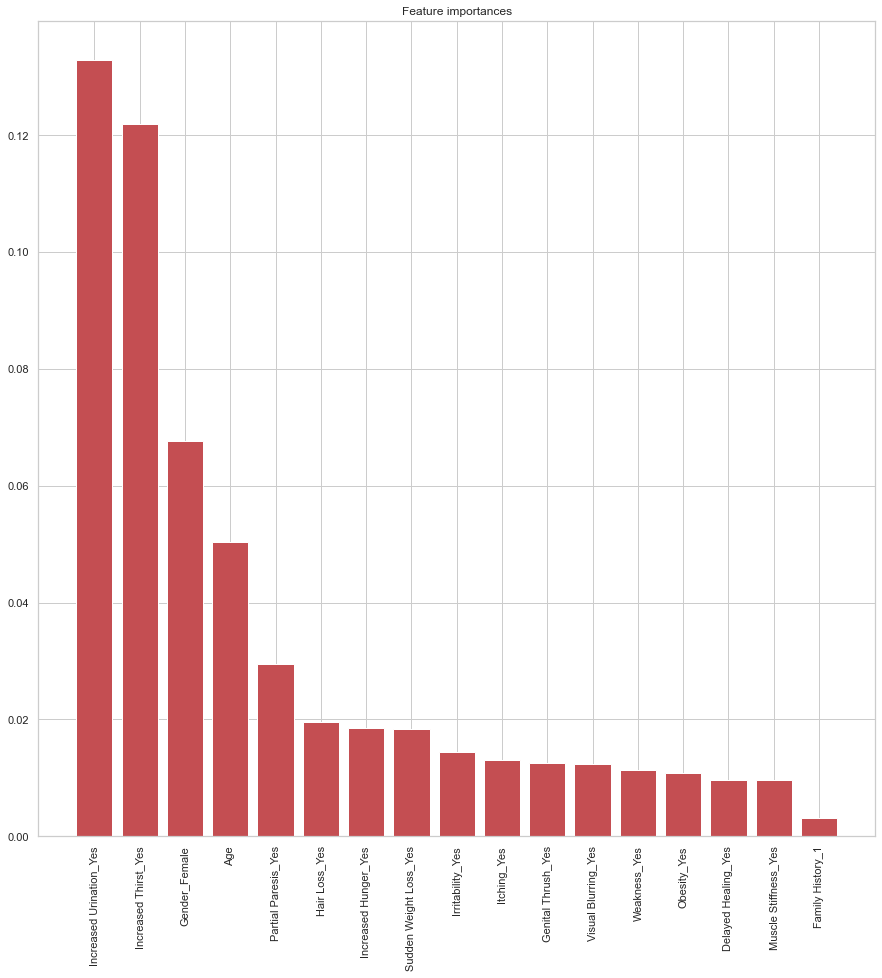

In [27]:
clf_RF = random_forest_est(250, X_train_HV, y_train_HV)

# Answers
i - The 2 most important features according to the random forest are "Increased urination" and "increased thirst".

ii - This result matches our expectation in question 3_d_ii - increased thirst and urination appear in the most important features list we mentioned before (with inverse relation between negative and positive subjects). The rest of the features of the list also appear as important according to the random forest analysis.


# Question 7

Data Separability Visualization

# a
Perform dimensionality reduction on the dataset

In [29]:
# run twice please, first time there is a bug

n_components = 2
pca_1 = PCA(n_components=n_components, whiten=True)

# apply PCA transformation
X_pca = pca_1.fit_transform(X_HV)


In [30]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

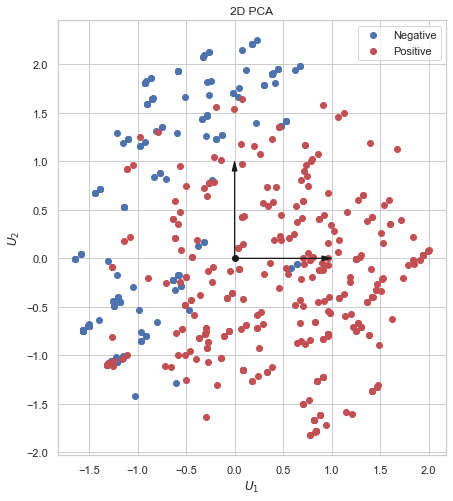

In [31]:
plt_2d_pca(X_pca,y_HV)

Above is a 2d plot that show samples with positive and negative labels in different colors.

# b
Our data quite sperable when reduced to just two features.

# c
Training the same models above on the dimensionality-reduced training set.

In [32]:
X_train_pca , X_test_pca, y_train_PCA, y_test_PCA = train_test_split(X_pca, y_HV, test_size=0.2, random_state=0, stratify = y_HV)

clf_pca = LR_best_model(X_train_pca, y_train_PCA, isPCA=1)
svm_lin_pca = SVMlin_best_model(X_train_pca, y_train_PCA, isPCA=1)
svm_nonlin_pca = SVMnonlin_best_model(X_train_pca, y_train_PCA, isPCA=1)
CV_rfc_pca = RandomForest_best_model(X_train_pca, y_train_PCA, isPCA=1)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] logistic__C=1000.0, logistic__penalty=l1 ........................
[CV]  logistic__C=1000.0, logistic__penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] logistic__C=1000.0, logistic__penalty=l1 ........................
[CV]  logistic__C=1000.0, logistic__penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] logistic__C=1000.0, logistic__penalty=l1 ........................
[CV]  logistic__C=1000.0, logistic__penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] logistic__C=1000.0, logistic__penalty=l1 ........................
[CV]  logisti

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solv


[CV]  logistic__C=100.0, logistic__penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l1 .........................
[CV]  logistic__C=100.0, logistic__penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l1 .........................
[CV]  logistic__C=100.0, logistic__penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.844, test=0.929), f1=(train=0.872, test=0.940), precision=(train=0.881, test=0.979

C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports o


[CV] logistic__C=1.0, logistic__penalty=l2 ...........................
[CV]  logistic__C=1.0, logistic__penalty=l2, accuracy=(train=0.868, test=0.833), f1=(train=0.892, test=0.860), precision=(train=0.900, test=0.896), recall=(train=0.883, test=0.827), roc_auc=(train=0.953, test=0.936), total=   0.0s
[CV] logistic__C=1.0, logistic__penalty=l2 ...........................
[CV]  logistic__C=1.0, logistic__penalty=l2, accuracy=(train=0.871, test=0.821), f1=(train=0.894, test=0.848), precision=(train=0.905, test=0.875), recall=(train=0.883, test=0.824), roc_auc=(train=0.958, test=0.910), total=   0.0s
[CV] logistic__C=1.0, logistic__penalty=l2 ...........................
[CV]  logistic__C=1.0, logistic__penalty=l2, accuracy=(train=0.866, test=0.843), f1=(train=0.889, test=0.871), precision=(train=0.905, test=0.880), recall=(train=0.874, test=0.863), roc_auc=(train=0.947, test=0.958), total=   0.0s
[CV] logistic__C=1.0, logistic__penalty=l2 ...........................
[CV]  logistic__C=1.0,

C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports o


[CV] logistic__C=0.1, logistic__penalty=l2 ...........................
[CV]  logistic__C=0.1, logistic__penalty=l2, accuracy=(train=0.866, test=0.843), f1=(train=0.889, test=0.871), precision=(train=0.905, test=0.880), recall=(train=0.874, test=0.863), roc_auc=(train=0.946, test=0.957), total=   0.0s
[CV] logistic__C=0.1, logistic__penalty=l2 ...........................
[CV]  logistic__C=0.1, logistic__penalty=l2, accuracy=(train=0.857, test=0.880), f1=(train=0.881, test=0.906), precision=(train=0.903, test=0.873), recall=(train=0.859, test=0.941), roc_auc=(train=0.946, test=0.963), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=l1 ..........................
[CV]  logistic__C=0.01, logistic__penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), roc_auc=(train=nan, test=nan), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=l1 ..........................
[CV]  logistic__C=0.01, logistic__penalty

C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports o


[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.939, test=0.975), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.951, test=0.936), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.617, test=0.607), f1=(train=0.763, test=0.756), precision=(train=0.617, test=0.607), recall=(train=1.000, test=1.000), roc_auc=(train=0.957, test=0.910), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.947, test=0.956), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.946, test=0.964), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.880, test=0.917), f1=(train=0.897, test=0.929), precision=(train=0.951, test=0.979), recall=(train=0.849, test=0.885), roc_auc=(train=0.939, test=0.974), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.886, test=0.881), f1=(train=0.903, test=0.894), preci

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.956, test=0.964), total=   0.0s
[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=poly ..
[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.939, test=0.975), total=   0.0s
[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=poly ..
[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.951, test=0.936), total=   0.0s
[CV] svm__C=0.001, 

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   35.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10, accuracy=(train=0.979, test=0.881), f1=(train=0.983, test=0.896), precision=(train=0.990, test=0.956), recall=(train=0.976, test=0.843), roc_auc=(train=0.999, test=0.908), total=   0.1s
[CV] rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10 
[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10, accuracy=(train=0.970, test=0.952), f1=(train=0.976, test=0.960), precision=(train=0.980, test=0.980), recall=(train=0.971, test=0.941), roc_auc=(train=0.998, test=0.978), total=   0.1s
[CV] rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10 
[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10, accuracy=(train=0.982, test=0.940), f1=(train=0.985, test=0.952), precision=(train=0.985, test=0.926), recall=(train=0.985, test=0.980), roc_auc=(train=0.999, test=0.982), total=   0.0s
[CV] rf__

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  1.8min finished


# d
Training the same models on the best two features from section 6.

In [33]:
X_2feat = df[["Increased Urination", "Increased Thirst"]]
X_2feat_HV = enc.fit_transform(X_2feat).toarray()
y_HV

X_train_2FHV , X_test_2FHV , y_train_2FHV , y_test_2FHV = train_test_split(X_2feat_HV, y_HV, test_size=0.2, random_state=0, stratify = y_HV)

clf_2feat = LR_best_model(X_train_2FHV, y_train_2FHV, isPCA=0)
svm_lin_2feat = SVMlin_best_model(X_train_2FHV, y_train_2FHV, isPCA=0)
svm_nonlin_2feat = SVMnonlin_best_model(X_train_2FHV, y_train_2FHV, isPCA=0)
CV_rfc_2feat = RandomForest_best_model(X_train_2FHV, y_train_2FHV, isPCA=0)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] logistic__C=1000.0, logistic__penalty=l1 ........................
[CV]  logistic__C=1000.0, logistic__penalty=l1, accuracy=(train=0.874, test=0.893), f1=(train=0.894, test=0.909), precision=(train=0.922, test=0.957), recall=(train=0.868, test=0.865), roc_auc=(train=0.912, test=0.920), total=   0.0s
[CV] logistic__C=1000.0, logistic__penalty=l1 ........................
[CV]  logistic__C=1000.0, logistic__penalty=l1, accuracy=(train=0.889, test=0.833), f1=(train=0.908, test=0.851), precision=(train=0.924, test=0.952), recall=(train=0.893, test=0.769), roc_auc=(train=0.926, test=0.870), total=   0.0s
[CV] logistic__C=1000.0, logistic__penalty=l1 ........................
[CV]  logistic__C=1000.0, logistic__penalty=l1, accuracy=(train=0.880, test=0.869), f1=(train=0.900, test=0.887), precision=(train=0.928, test=0.935), recall=(train=0.874, test=0.843), roc_auc=(train=0.918, test=0.898), total=   0.0s
[CV] logistic__C=1000.0,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  logistic__C=100.0, logistic__penalty=l1, accuracy=(train=0.880, test=0.869), f1=(train=0.900, test=0.887), precision=(train=0.928, test=0.935), recall=(train=0.874, test=0.843), roc_auc=(train=0.918, test=0.898), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l1 .........................
[CV]  logistic__C=100.0, logistic__penalty=l1, accuracy=(train=0.878, test=0.880), f1=(train=0.896, test=0.902), precision=(train=0.937, test=0.902), recall=(train=0.859, test=0.902), roc_auc=(train=0.912, test=0.917), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l1 .........................
[CV]  logistic__C=100.0, logistic__penalty=l1, accuracy=(train=0.869, test=0.916), f1=(train=0.888, test=0.933), precision=(train=0.935, test=0.907), recall=(train=0.845, test=0.961), roc_auc=(train=0.904, test=0.956), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.874, test=0.893), f1=(t

C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classi

[CV]  logistic__C=0.01, logistic__penalty=l1, accuracy=(train=0.386, test=0.381), f1=(train=0.000, test=0.000), precision=(train=0.000, test=0.000), recall=(train=0.000, test=0.000), roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=l1 ..........................
[CV]  logistic__C=0.01, logistic__penalty=l1, accuracy=(train=0.386, test=0.381), f1=(train=0.000, test=0.000), precision=(train=0.000, test=0.000), recall=(train=0.000, test=0.000), roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=l1 ..........................
[CV]  logistic__C=0.01, logistic__penalty=l1, accuracy=(train=0.383, test=0.393), f1=(train=0.000, test=0.000), precision=(train=0.000, test=0.000), recall=(train=0.000, test=0.000), roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=l1 ..........................
[CV]  logistic__C=0.01, logistic__penalty=l1, accuracy=(train=0.385, test=0.386), f1=(train

C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tom\anaconda3\envs\bm-336546\lib\site-packages\sklearn\metrics\_classi

[CV]  logistic__C=0.001, logistic__penalty=l1, accuracy=(train=0.385, test=0.386), f1=(train=0.000, test=0.000), precision=(train=0.000, test=0.000), recall=(train=0.000, test=0.000), roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] logistic__C=0.001, logistic__penalty=l1 .........................
[CV]  logistic__C=0.001, logistic__penalty=l1, accuracy=(train=0.385, test=0.386), f1=(train=0.000, test=0.000), precision=(train=0.000, test=0.000), recall=(train=0.000, test=0.000), roc_auc=(train=0.500, test=0.500), total=   0.0s
[CV] logistic__C=0.001, logistic__penalty=l2 .........................
[CV]  logistic__C=0.001, logistic__penalty=l2, accuracy=(train=0.874, test=0.893), f1=(train=0.894, test=0.909), precision=(train=0.922, test=0.957), recall=(train=0.868, test=0.865), roc_auc=(train=0.909, test=0.925), total=   0.0s
[CV] logistic__C=0.001, logistic__penalty=l2 .........................
[CV]  logistic__C=0.001, logistic__penalty=l2, accuracy=(train=0.889, test=0.833), f1=(t

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.912, test=0.917), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.902, test=0.959), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.826, test=0.845), f1=(train=0.845, test=0.857), precision=(train=0.935, test=1.000), recall=(train=0.771, test=0.750), roc_auc=(train=0.909, test=0.925), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear,

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.902, test=0.959), total=   0.0s
[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=poly ..
[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.909, test=0.925), total=   0.0s
[CV] svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=poly ..
[CV]  svm__C=0.001, svm__degree=1, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.924, test=0.871), total=   0.0s
[CV] svm__C=0.001, 

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10 
[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10, accuracy=(train=0.880, test=0.869), f1=(train=0.900, test=0.887), precision=(train=0.928, test=0.935), recall=(train=0.874, test=0.843), roc_auc=(train=0.918, test=0.898), total=   0.0s
[CV] rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10 
[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10, accuracy=(train=0.878, test=0.880), f1=(train=0.896, test=0.902), precision=(train=0.937, test=0.902), recall=(train=0.859, test=0.902), roc_auc=(train=0.912, test=0.917), total=   0.0s
[CV] rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10 
[CV]  rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=10, accuracy=(train=0.869, test=0.916), f1=(train=0.888, test=0.933), precision=(train=0.935, test=0.907), recal

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  1.6min finished


# e

In [34]:
print("PCA logreg model")
Calc_Loss(clf_pca, X_train_pca, X_test_pca, y_train_HV, y_test_HV, "LR")
performances(clf_pca, X_train_pca, X_test_pca, y_train_HV, y_test_HV)

print("")
print("PCA svm lin model")
Calc_Loss(svm_lin_pca, X_train_pca, X_test_pca, y_train_HV, y_test_HV, "SVM")
performances(svm_lin_pca, X_train_pca, X_test_pca, y_train_HV, y_test_HV)

print("")
print("PCA svm non-lin model")
Calc_Loss(svm_nonlin_pca, X_train_pca, X_test_pca, y_train_HV, y_test_HV, "SVM")
performances(svm_nonlin_pca, X_train_pca, X_test_pca, y_train_HV, y_test_HV)

print("")
print("PCA Random Forest non-lin model")
performances(CV_rfc_pca, X_train_pca, X_test_pca, y_train_HV, y_test_HV)

PCA logreg model
Train loss is 0.27
Test loss is 0.39
TRAIN: AUC = 0.95 F1 = 0.89 ACC =0.86
TEST: AUC = 0.91 F1 = 0.86 ACC = 0.83

PCA svm lin model
Train loss is 0.71
Test loss is 0.72
TRAIN: AUC = 0.95 F1 = 0.76 ACC =0.61
TEST: AUC = 0.91 F1 = 0.76 ACC = 0.61

PCA svm non-lin model
Train loss is 0.23
Test loss is 0.31
TRAIN: AUC = 0.97 F1 = 0.92 ACC =0.90
TEST: AUC = 0.94 F1 = 0.89 ACC = 0.87

PCA Random Forest non-lin model
TRAIN: AUC = 1.00 F1 = 0.99 ACC =0.99
TEST: AUC = 0.95 F1 = 0.92 ACC = 0.90


In [35]:
print("2 feat logreg model")
Calc_Loss(clf_2feat, X_train_2FHV, X_test_2FHV, y_train_2FHV, y_test_2FHV, "LR")
performances(clf_2feat, X_train_2FHV, X_test_2FHV, y_train_2FHV, y_test_2FHV)

print("")
print("2 feat svm lin model")
Calc_Loss(svm_lin_2feat, X_train_2FHV, X_test_2FHV, y_train_2FHV, y_test_2FHV, "SVM")
performances(svm_lin_2feat, X_train_2FHV, X_test_2FHV, y_train_2FHV, y_test_2FHV)

print("")
print("2 feat svm non-lin model")
Calc_Loss(svm_nonlin_2feat, X_train_2FHV, X_test_2FHV, y_train_2FHV, y_test_2FHV, "SVM")
performances(svm_nonlin_2feat, X_train_2FHV, X_test_2FHV, y_train_2FHV, y_test_2FHV)

print("")
print("2 feat Random Forest non-lin model")
performances(CV_rfc_2feat, X_train_2FHV, X_test_2FHV, y_train_2FHV, y_test_2FHV)

2 feat logreg model
Train loss is 0.48
Test loss is 0.50
TRAIN: AUC = 0.91 F1 = 0.90 ACC =0.88
TEST: AUC = 0.88 F1 = 0.86 ACC = 0.84

2 feat svm lin model
Train loss is 0.24
Test loss is 0.32
TRAIN: AUC = 0.91 F1 = 0.90 ACC =0.88
TEST: AUC = 0.88 F1 = 0.86 ACC = 0.84

2 feat svm non-lin model
Train loss is 0.24
Test loss is 0.32
TRAIN: AUC = 0.91 F1 = 0.90 ACC =0.88
TEST: AUC = 0.88 F1 = 0.86 ACC = 0.84

2 feat Random Forest non-lin model
TRAIN: AUC = 0.91 F1 = 0.90 ACC =0.88
TEST: AUC = 0.88 F1 = 0.86 ACC = 0.84


We can see from the results that PCA performed better than 2 features. This makes sense because PCA reduces dimentionality to 2 while taking into consideration all of the features. Choosing two features manually could miss the contribution of some other features (which were taken into consideration in the PCA).